<a href="https://colab.research.google.com/github/rohitmishra0/Cryptocurrency-Maximum-Return-Model/blob/main/BITCOIN_Project_IIT_Kgp_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [8]:
#Loading the datasets
file_path = 'Bitcoin.csv'

# Load the Bitcoin dataset
bitcoin_df = pd.read_csv(file_path, parse_dates=['Start', 'End'], dayfirst=True)

bitcoin_df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2022-01-31,2022-02-01,37913.23950,38669.25890,36692.12497,38472.00624,5.554980e+10,7.113510e+11
1,2022-01-30,2022-01-31,38161.92909,38287.75460,37412.24810,37937.33900,3.479342e+10,7.187560e+11
2,2022-01-29,2022-01-30,37741.92840,38577.99630,37369.20977,38131.82360,4.335900e+10,7.161950e+11
3,2022-01-28,2022-01-29,37062.96443,37929.94480,36168.92719,37784.72290,5.773464e+10,7.015910e+11
4,2022-01-27,2022-01-28,36786.69371,37201.84235,35519.97400,37201.84235,7.216674e+10,6.884230e+11
...,...,...,...,...,...,...,...,...
1487,2018-01-05,2018-01-06,15197.76475,17161.63500,14878.04817,16989.16148,1.960998e+10,2.718430e+11
1488,2018-01-04,2018-01-05,15168.97237,16708.70927,14286.66985,15163.89895,1.785376e+10,2.510370e+11
1489,2018-01-03,2018-01-04,14895.27537,15646.49864,14470.73767,15079.15218,1.548623e+10,2.538830e+11
1490,2018-01-02,2018-01-03,13644.69304,15468.20814,13195.87352,14938.17668,1.151926e+10,2.345980e+11


In [9]:
bitcoin_df.shape

(1492, 8)

In [10]:
bitcoin_df.dtypes

,0
Start,datetime64[ns]
End,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64
Market Cap,float64


In [11]:
bitcoin_df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2022-01-31,2022-02-01,37913.23950,38669.25890,36692.12497,38472.00624,5.554980e+10,7.113510e+11
1,2022-01-30,2022-01-31,38161.92909,38287.75460,37412.24810,37937.33900,3.479342e+10,7.187560e+11
2,2022-01-29,2022-01-30,37741.92840,38577.99630,37369.20977,38131.82360,4.335900e+10,7.161950e+11
3,2022-01-28,2022-01-29,37062.96443,37929.94480,36168.92719,37784.72290,5.773464e+10,7.015910e+11
4,2022-01-27,2022-01-28,36786.69371,37201.84235,35519.97400,37201.84235,7.216674e+10,6.884230e+11


In [12]:
bitcoin_df.columns

Index(['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [13]:
bitcoin_df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,1492,1492,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03
mean,2020-01-16 12:00:00,2020-01-17 12:00:00,18816.252717,19311.132789,18266.275600,18833.464278,3.657497e+10,3.472819e+11
min,2018-01-01 00:00:00,2018-01-02 00:00:00,3239.810072,3269.710130,3188.542617,3236.700910,2.039620e+09,5.632816e+10
25%,2019-01-08 18:00:00,2019-01-09 18:00:00,7149.509310,7298.108737,6939.399154,7150.094723,5.864773e+09,1.266378e+11
50%,2020-01-16 12:00:00,2020-01-17 12:00:00,9548.948573,9719.633291,9343.692017,9545.070665,2.238476e+10,1.720340e+11
75%,2021-01-23 06:00:00,2021-01-24 06:00:00,32743.367110,33863.403222,31321.337500,32791.138618,5.540269e+10,6.140600e+11
max,2022-01-31 00:00:00,2022-02-01 00:00:00,67510.919420,68769.955370,66358.933600,67500.024740,2.121520e+11,1.273520e+12
std,NaN,NaN,17860.860410,18341.510827,17314.377450,17869.431020,3.751459e+10,3.384977e+11


In [14]:
bitcoin_df.isnull()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1487,False,False,False,False,False,False,False,False
1488,False,False,False,False,False,False,False,False
1489,False,False,False,False,False,False,False,False
1490,False,False,False,False,False,False,False,False


In [15]:
bitcoin_df.isnull().sum()

,0
Start,0
End,0
Open,0
High,0
Low,0
Close,0
Volume,0
Market Cap,0


In [ ]:
#Here none of the tuple is null so we didn't need to perform cleaning step but just to ensure other cleaning features like duplicate, data types and all

In [16]:
# # Drop rows with missing values
# bitcoin_df.dropna(inplace=True)

# # Fill missing values with mean
# bitcoin_df.fillna(bitcoin_df.mean(), inplace=True)

# #this is giving error bcoz we hv applied mean function but all the columns are not having numerical value

In [17]:
bitcoin_df.shape

(1492, 8)

In [18]:
# Split the data into training and testing sets
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
X_train, X_test, y_train, y_test = train_test_split(bitcoin_df[features], bitcoin_df[target], test_size=0.2, random_state=1)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

              Open          High           Low        Volume
335   49589.983820  50179.372780  47150.260160  1.116020e+11
301   58197.978730  59134.630000  56844.948890  9.793117e+10
314   54185.293580  55799.020000  53213.998950  1.094500e+11
1253   6708.159869   6885.057976   6671.239735  3.208585e+09
931   10227.417500  11029.553920  10041.932580  2.521283e+10
...            ...           ...           ...           ...
715    9908.084222  10032.343090   9687.006103  3.652547e+10
905   11857.758760  11925.963230  11295.234140  1.815246e+10
1096   3468.567305   3489.921013   3431.555778  3.724578e+09
235   37343.285960  38252.790000  35840.020000  7.925503e+10
1061   3873.817022   3911.321320   3864.757248  7.068518e+09

[1193 rows x 4 columns]
              Open          High           Low        Volume
91    61290.081560  62368.257640  59674.610410  7.619252e+10
288   60028.390000  60274.640000  52569.439890  1.858120e+11
167   45942.602400  47029.598260  44569.559800  7.621655e+10

In [19]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=500, random_state=1)

In [20]:
from sklearn.metrics import mean_absolute_error
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model performance
mse1 = mean_squared_error(y_test, predictions)
mae1 = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error: {mse1}')
print(mae1)

Mean Squared Error: 279500.269210414
284.3754934917912


In [21]:
#<---------------------------------LINEAR REGRESSION------------------------------------>
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
linear_predictions = linear_model.predict(X_test)

# Evaluate the model performance
linear_mse2 = mean_squared_error(y_test, linear_predictions)
mae2 = mean_absolute_error(y_test, predictions)
print(f'Linear Regression Mean Squared Error: {linear_mse2}')
print(mae2)

Linear Regression Mean Squared Error: 169835.6227135945
284.3754934917912


In [22]:
#<---------------------------------XGBOOST------------------------------------>
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=500, random_state=1)

# Fit the model on the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the test data
xgboost_predictions = xgboost_model.predict(X_test)

# Evaluate the model performance
xgboost_mse3 = mean_squared_error(y_test, xgboost_predictions)
mae3 = mean_absolute_error(y_test, predictions)
print(f'XGBoost Mean Squared Error: {xgboost_mse3}')
print(mae3)

XGBoost Mean Squared Error: 305947.70422928716
284.3754934917912


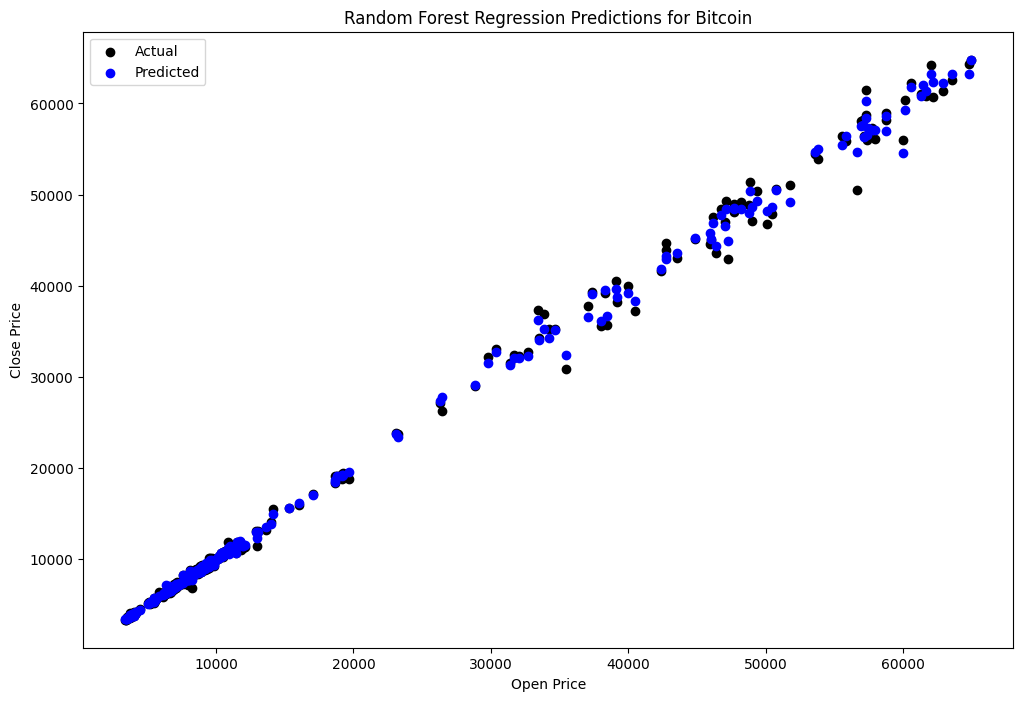

In [23]:
#rohit
# Plot the predictions vs actual values
plt.figure(figsize=(12, 8))
plt.scatter(X_test['Open'], y_test, color='black', label='Actual')
plt.scatter(X_test['Open'], predictions, color='blue', label='Predicted')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.title('Random Forest Regression Predictions for Bitcoin')
plt.show()

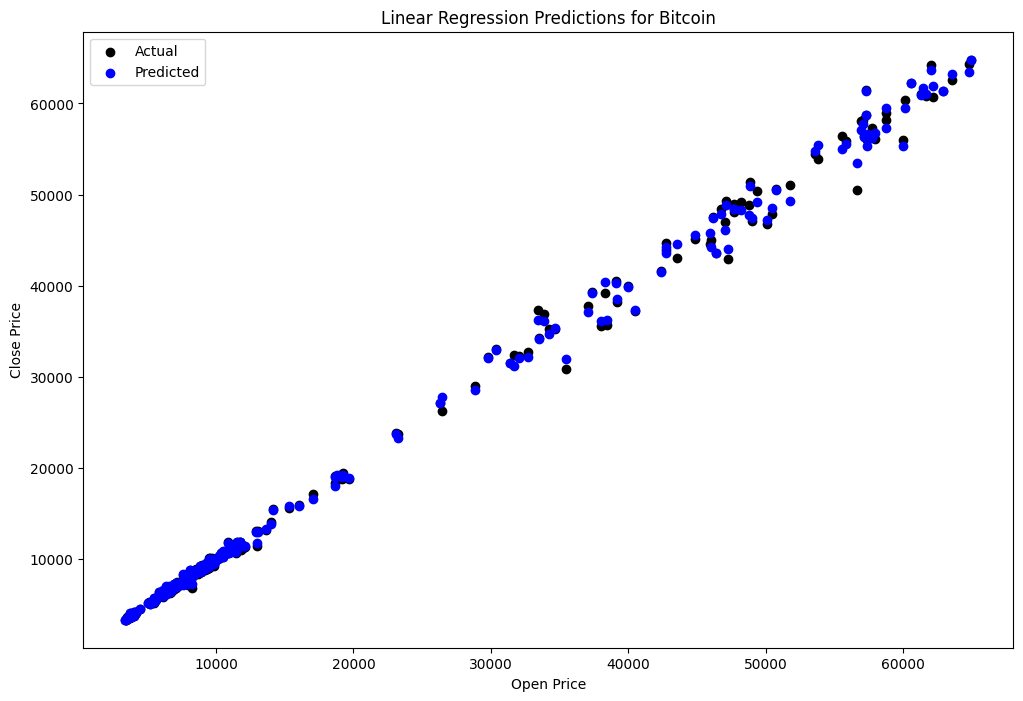

In [24]:
# Plot the predictions vs actual values
plt.figure(figsize=(12, 8))
plt.scatter(X_test['Open'], y_test, color='black', label='Actual')
plt.scatter(X_test['Open'], linear_predictions, color='blue', label='Predicted')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.title('Linear Regression Predictions for Bitcoin')
plt.show()

Mean Squared Error for /content/bitcoin.csv: 169835.6227135945


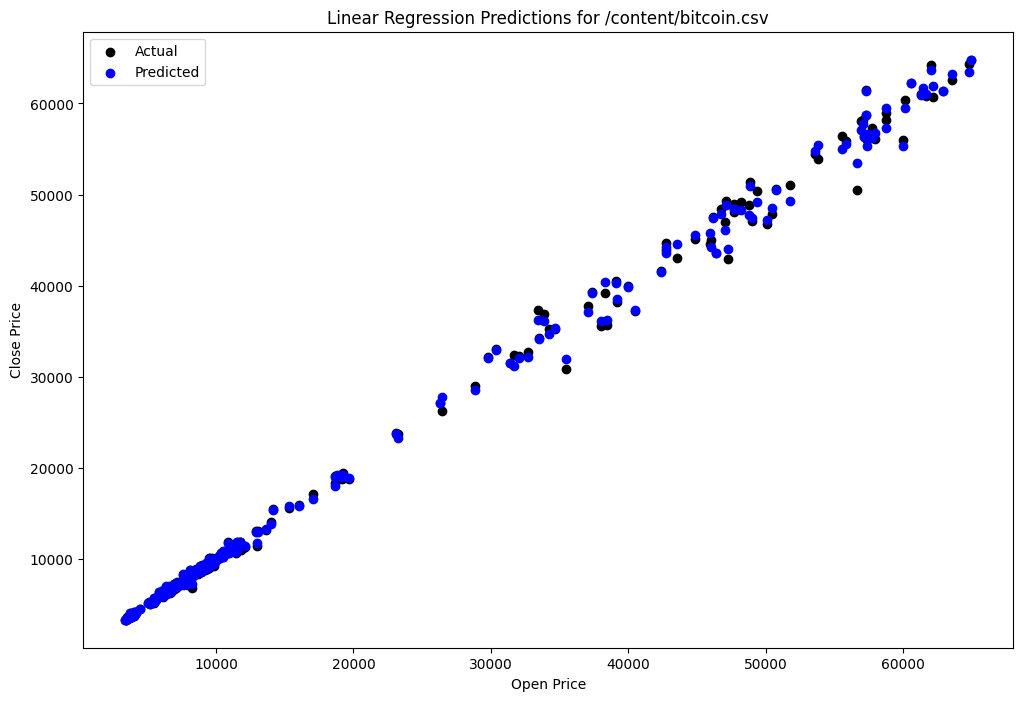

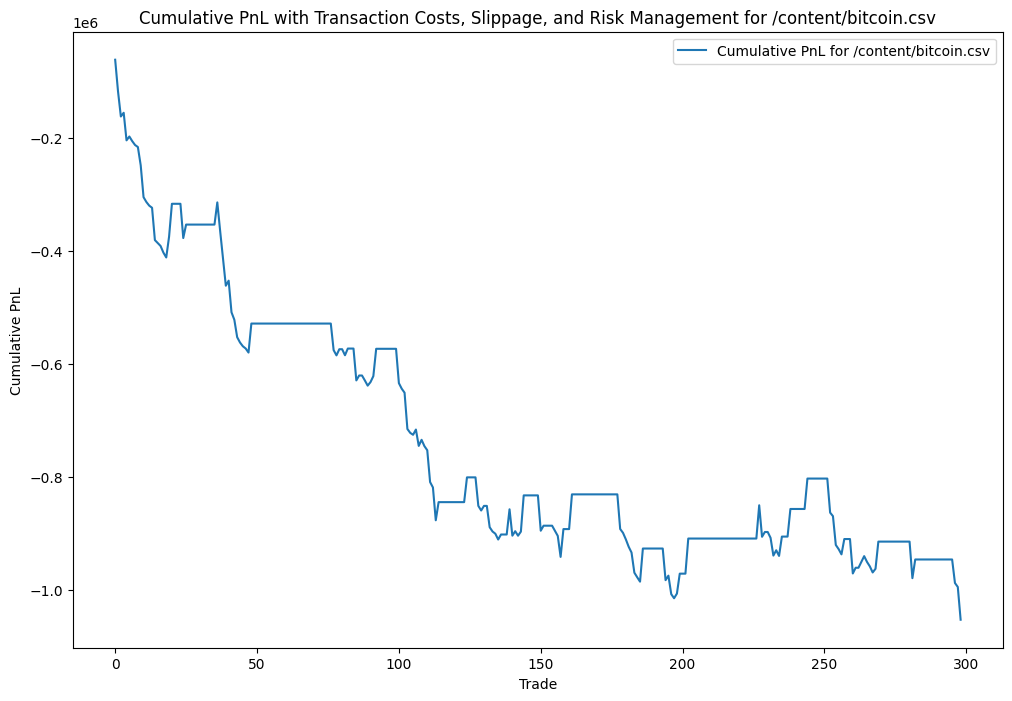

In [26]:
def backtest_linear_regression_positive_pnl(dataset_name, features, target, stop_loss_percent=0.08, transaction_costs=0.0015, slippage_factor=0.001):
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error

    # Load the dataset
    df = pd.read_csv(file_path)

    # Drop NaN values for simplicity (you might want to handle NaN values differently)
    df.dropna(subset=[target] + features, inplace=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=1)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Initialize variables to track trading positions and PnL
    positions = []
    pnl = []
    stop_loss_price = 0

    for i in range(len(predictions)):
        # Check if stop-loss is triggered
        if stop_loss_price > 0 and X_test['Low'].iloc[i] <= stop_loss_price:
            # Close position due to stop-loss
            position = 0
        else:
            # Simulate buying or selling based on the prediction
            if predictions[i] > X_test['Open'].iloc[i] * 1.01:
                # Buy only when predicted price change is significantly positive
                position = 1
                # Set stop-loss price for the long position
                stop_loss_price = X_test['Open'].iloc[i] * (1 - stop_loss_percent)
            else:
                # Sell
                position = -1
                # Reset stop-loss price for short position
                stop_loss_price = 0

        # Calculate transaction cost
        transaction_cost = transaction_costs * abs(position)

        # Simulate slippage
        slippage = slippage_factor * X_test['Open'].iloc[i]

        # Update trading position and PnL
        positions.append(position)
        pnl.append(position * (y_test.iloc[i] - slippage - transaction_cost))

    # Calculate cumulative PnL
    cumulative_pnl = pd.Series(pnl).cumsum()

    # Evaluate the model performance with transaction costs, slippage, and risk management
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error for {dataset_name}: {mse}')

    # Plot the predictions vs actual values
    plt.figure(figsize=(12, 8))
    plt.scatter(X_test['Open'], y_test, color='black', label='Actual')
    plt.scatter(X_test['Open'], predictions, color='blue', label='Predicted')
    plt.xlabel('Open Price')
    plt.ylabel('Close Price')
    plt.legend()
    plt.title(f'Linear Regression Predictions for {dataset_name}')
    plt.show()

    # Plot the cumulative PnL
    plt.figure(figsize=(12, 8))
    plt.plot(cumulative_pnl, label=f'Cumulative PnL for {dataset_name}')
    plt.xlabel('Trade')
    plt.ylabel('Cumulative PnL')
    plt.legend()
    plt.title(f'Cumulative PnL with Transaction Costs, Slippage, and Risk Management for {dataset_name}')
    plt.show()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Perform backtesting for Bitcoin with adjusted risk management for positive PnL using Linear Regression
backtest_linear_regression_positive_pnl('/content/bitcoin.csv', features, target, stop_loss_percent=0.08)

Mean Squared Error for Bitcoin.csv: 169835.6227135945


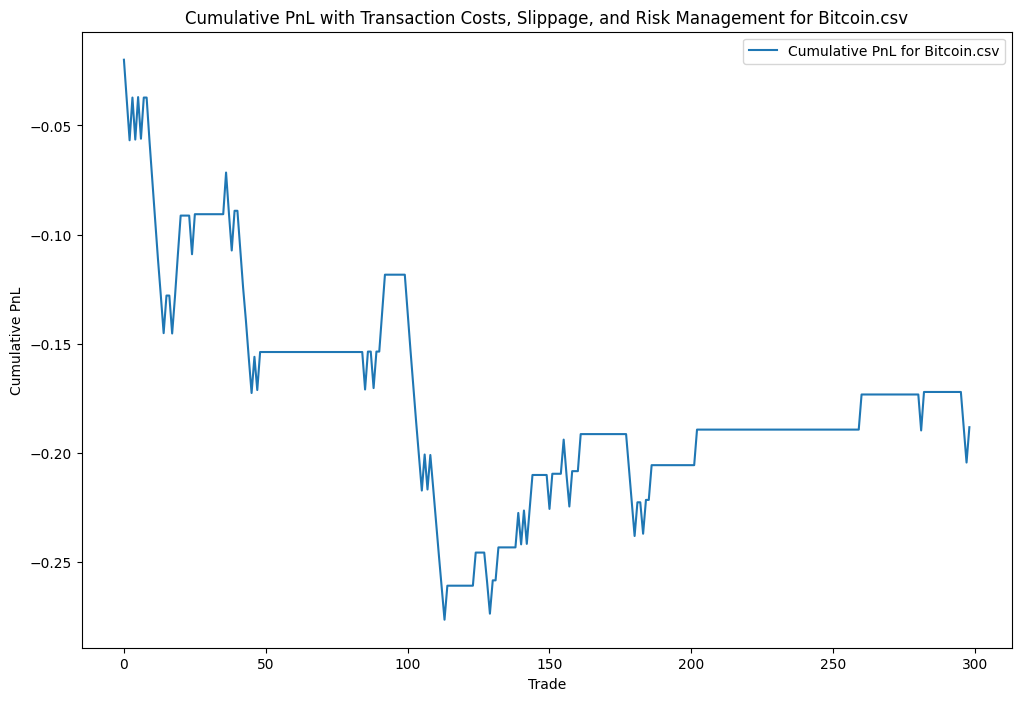

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def backtest(dataset_name, features, target, risk_percent=0.02, transaction_costs=0.0015, slippage_factor=0.002):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Drop NaN values for simplicity (you might want to handle NaN values differently)
    df.dropna(subset=[target] + features, inplace=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=1)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Initialize variables to track trading positions and PnL
    positions = []
    pnl = []
    stop_loss_price = 0
    portfolio_value = 1  # Start with a portfolio value of 1 (normalized)

    for i in range(len(predictions)):
        # Check if stop-loss is triggered
        if stop_loss_price > 0 and X_test['Low'].iloc[i] <= stop_loss_price:
            # Close position due to stop-loss
            position = 0
        else:
            # Simulate buying or selling based on the prediction
            if predictions[i] > X_test['Open'].iloc[i]:
                # Buy
                position = risk_percent * portfolio_value / X_test['Open'].iloc[i]
                # Set stop-loss price for the long position
                stop_loss_price = X_test['Open'].iloc[i] * (1 - risk_percent)
            else:
                # Sell
                position = -risk_percent * portfolio_value / X_test['Open'].iloc[i]
                # Reset stop-loss price for short position
                stop_loss_price = 0

        # Calculate transaction cost
        transaction_cost = transaction_costs * abs(position) * X_test['Open'].iloc[i]

        # Simulate slippage
        slippage = slippage_factor * X_test['Open'].iloc[i]

        # Update trading position and PnL
        positions.append(position)
        pnl.append(position * (y_test.iloc[i] - slippage - transaction_cost))

        # Update portfolio value
        portfolio_value += pnl[-1]

    # Calculate cumulative PnL
    cumulative_pnl = pd.Series(pnl).cumsum()

    # Evaluate the model performance with transaction costs, slippage, and risk management
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error for {dataset_name}: {mse}')

    # Plot the cumulative PnL
    plt.figure(figsize=(12, 8))
    plt.plot(cumulative_pnl, label=f'Cumulative PnL for {dataset_name}')
    plt.xlabel('Trade')
    plt.ylabel('Cumulative PnL')
    plt.legend()
    plt.title(f'Cumulative PnL with Transaction Costs, Slippage, and Risk Management for {dataset_name}')
    plt.show()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Perform backtesting for Bitcoin with risk management
backtest('Bitcoin.csv', features, target, risk_percent=0.02)